# Project 3: Web APIs & Classification


### Project Goal

1. Using Reddit's API, collect posts from two subreddits of your choosing.
2. Using NLP to train a classifier on which subreddit a given post came from. This is a binary classification problem.


In [55]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import regex as re
import requests
import pandas as pd
import time
import random

import scikitplot as skplt
import matplotlib.pyplot as plt
import numpy as np

### Webscraping

Scraping posts from two subreddit Windows and Mac.


In [3]:
url1 = "https://www.reddit.com/r/windows.json"
url2 = "https://www.reddit.com/r/mac.json"

In [4]:
res1 = requests.get(url1, headers={'User-agent': 'Jing Jing 1.0'})
res2 = requests.get(url2, headers={'User-agent': 'Jing Jing 1.0'})

In [5]:
res1.status_code
res2.status_code

200

In [6]:
reddit_dict1 = res1.json()
reddit_dict2 = res2.json()

In [7]:
reddit_dict1.keys()

dict_keys(['kind', 'data'])

In [8]:
reddit_dict1['kind']

'Listing'

In [9]:
reddit_dict1['data'].keys()

dict_keys(['modhash', 'dist', 'children', 'after', 'before'])

In [10]:
reddit_dict1['data']['children']

[{'kind': 't3',
  'data': {'approved_at_utc': None,
   'subreddit': 'windows',
   'selftext': '',
   'author_fullname': 't2_h6hl9',
   'saved': False,
   'mod_reason_title': None,
   'gilded': 0,
   'clicked': False,
   'title': 'Microsoft starts notifying Windows 7 users about end of support',
   'link_flair_richtext': [],
   'subreddit_name_prefixed': 'r/windows',
   'hidden': False,
   'pwls': 6,
   'link_flair_css_class': 'update',
   'downs': 0,
   'thumbnail_height': None,
   'hide_score': False,
   'name': 't3_b46a77',
   'quarantine': False,
   'link_flair_text_color': 'dark',
   'author_flair_background_color': None,
   'subreddit_type': 'public',
   'ups': 264,
   'total_awards_received': 0,
   'media_embed': {},
   'thumbnail_width': None,
   'author_flair_template_id': None,
   'is_original_content': False,
   'user_reports': [],
   'secure_media': None,
   'is_reddit_media_domain': False,
   'is_meta': False,
   'category': None,
   'secure_media_embed': {},
   'link_flair

In [11]:
len(reddit_dict1['data']['children'])

27

In [12]:
reddit_dict1['data']['children'][0]['data']

{'approved_at_utc': None,
 'subreddit': 'windows',
 'selftext': '',
 'author_fullname': 't2_h6hl9',
 'saved': False,
 'mod_reason_title': None,
 'gilded': 0,
 'clicked': False,
 'title': 'Microsoft starts notifying Windows 7 users about end of support',
 'link_flair_richtext': [],
 'subreddit_name_prefixed': 'r/windows',
 'hidden': False,
 'pwls': 6,
 'link_flair_css_class': 'update',
 'downs': 0,
 'thumbnail_height': None,
 'hide_score': False,
 'name': 't3_b46a77',
 'quarantine': False,
 'link_flair_text_color': 'dark',
 'author_flair_background_color': None,
 'subreddit_type': 'public',
 'ups': 264,
 'total_awards_received': 0,
 'media_embed': {},
 'thumbnail_width': None,
 'author_flair_template_id': None,
 'is_original_content': False,
 'user_reports': [],
 'secure_media': None,
 'is_reddit_media_domain': False,
 'is_meta': False,
 'category': None,
 'secure_media_embed': {},
 'link_flair_text': 'Update',
 'can_mod_post': False,
 'score': 264,
 'approved_by': None,
 'thumbnail': '

In [13]:
reddit_dict1['data']['children'][0]['data']['subreddit']

'windows'

In [14]:
posts = [p['data'] for p in reddit_dict1['data']['children']]

In [15]:
pd.DataFrame(posts)

,all_awardings,approved_at_utc,approved_by,archived,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,thumbnail_width,title,total_awards_received,ups,url,user_reports,view_count,visited,whitelist_status,wls
0,[],None,None,False,jeffreymcclain,None,None,[],None,None,...,NaN,Microsoft starts notifying Windows 7 users abo...,0,264,https://support.microsoft.com/en-us/help/44931...,[],None,False,all_ads,6
1,[],None,None,False,wickedplayer494,None,None,[],None,None,...,NaN,"Windows 7, Windows 8.1, Windows Server 2008 R2...",0,14,https://www.reddit.com/r/windows/comments/bzkc...,[],None,False,all_ads,6
2,[],None,None,False,FactCheckPolice,None,None,[],None,None,...,140.0,Here's a dose of Nostalgia. The original MS Pa...,0,100,https://jspaint.app/,[],None,False,all_ads,6
3,[],None,None,False,jenmsft,,msft,[],None,Software Engineer,...,140.0,Introducing Microsoft Edge preview builds for ...,0,15,https://blogs.windows.com/msedgedev/2019/06/19...,[],None,False,all_ads,6
4,[],None,None,False,Gannondank,None,None,[],None,None,...,140.0,New computer: Acer Predator Triton 500. Any id...,0,4,https://v.redd.it/d48409a1cf531,[],None,False,all_ads,6
5,[],None,None,False,exquisityreddit,None,None,[],None,None,...,NaN,Help please! :(,0,29,https://www.reddit.com/r/windows/comments/c2i4...,[],None,False,all_ads,6
6,[],None,None,False,Teedious,None,None,[],None,None,...,NaN,"Wifi screen closes by itself, unable to select...",0,2,https://www.reddit.com/r/windows/comments/c2s2...,[],None,False,all_ads,6
7,[],None,None,False,Ahovv,None,None,[],None,None,...,NaN,Recent Windows update force-enabled Windows De...,0,2,https://www.reddit.com/r/windows/comments/c2rv...,[],None,False,all_ads,6
8,[],None,None,False,Hardcore_Daddy,None,None,[],None,None,...,NaN,Would a 2010 Home and Office windows key still...,0,2,https://www.reddit.com/r/windows/comments/c2rn...,[],None,False,all_ads,6
9,[],None,None,False,QRP1940,None,None,[],None,None,...,NaN,game lag when headphones are connected to my p...,0,4,https://www.reddit.com/r/windows/comments/c2ne...,[],None,False,all_ads,6


In [16]:
reddit_dict1['data']['after']

't3_c2g970'

In [17]:
pd.DataFrame(posts)['name']

0     t3_b46a77
1     t3_bzkccd
2     t3_c2nc5u
3     t3_c2mvqt
4     t3_c2qep0
5     t3_c2i4iu
6     t3_c2s2ec
7     t3_c2rv5t
8     t3_c2rns2
9     t3_c2nehj
10    t3_c2smbz
11    t3_c2ora6
12    t3_c2onzy
13    t3_c2mhzu
14    t3_c2qgsr
15    t3_c2k862
16    t3_c2nwa5
17    t3_c2l1ry
18    t3_c2pun4
19    t3_c2f6q1
20    t3_c2n760
21    t3_c2n6ip
22    t3_c2pljk
23    t3_c2iihw
24    t3_c2pght
25    t3_c2i7gy
26    t3_c2g970
Name: name, dtype: object

In [18]:
url1 + '?after=' + reddit_dict1['data']['after']

'https://www.reddit.com/r/windows.json?after=t3_c2g970'

In [19]:
#Scraping posts from Wimdows subreddit
posts1 = []
after = None

for a in range(35):
    if after == None:
        current_url = url1
    else:
        current_url = url1 + '?after=' + after
    print(current_url)
    res = requests.get(current_url, headers={'User-agent': 'Jing Jing 1.0'})
    
    if res.status_code != 200:
        print('Status error', res.status_code)
        break
    
    current_dict = res.json()
    current_posts = [p['data'] for p in current_dict['data']['children']]
    posts1.extend(current_posts)
    after = current_dict['data']['after']
    
    # generate a random sleep duration to look more 'natural'
    sleep_duration = random.randint(2,15)
    print(sleep_duration)
    time.sleep(sleep_duration)

https://www.reddit.com/r/windows.json
8
https://www.reddit.com/r/windows.json?after=t3_c2g970
15
https://www.reddit.com/r/windows.json?after=t3_c28yel
9
https://www.reddit.com/r/windows.json?after=t3_c1teks
7
https://www.reddit.com/r/windows.json?after=t3_c1s3j1
8
https://www.reddit.com/r/windows.json?after=t3_c14hag
15
https://www.reddit.com/r/windows.json?after=t3_c1172r
4
https://www.reddit.com/r/windows.json?after=t3_c0k0n3
7
https://www.reddit.com/r/windows.json?after=t3_c0czy0
6
https://www.reddit.com/r/windows.json?after=t3_c010g1
3
https://www.reddit.com/r/windows.json?after=t3_bzyxso
15
https://www.reddit.com/r/windows.json?after=t3_bzdc9c
7
https://www.reddit.com/r/windows.json?after=t3_bzfumz
15
https://www.reddit.com/r/windows.json?after=t3_bz5rbu
7
https://www.reddit.com/r/windows.json?after=t3_bz138l
14
https://www.reddit.com/r/windows.json?after=t3_byqbll
12
https://www.reddit.com/r/windows.json?after=t3_by9rv8
6
https://www.reddit.com/r/windows.json?after=t3_by1507
6
ht

In [20]:
pd.DataFrame(posts1).shape

(861, 105)

In [21]:
#Scraping posts from Mac subreddit
posts2 = []
after = None

for a in range(40):
    if after == None:
        current_url = url2
    else:
        current_url = url2 + '?after=' + after
    print(current_url)
    res = requests.get(current_url, headers={'User-agent': 'Jing Jing 1.0'})
    
    if res.status_code != 200:
        print('Status error', res.status_code)
        break
    
    current_dict = res.json()
    current_posts = [p['data'] for p in current_dict['data']['children']]
    posts2.extend(current_posts)
    after = current_dict['data']['after']
    
    # generate a random sleep duration to look more 'natural'
    sleep_duration = random.randint(2,15)
    print(sleep_duration)
    time.sleep(sleep_duration)

https://www.reddit.com/r/mac.json
8
https://www.reddit.com/r/mac.json?after=t3_c2r3hk
4
https://www.reddit.com/r/mac.json?after=t3_c2n2lx
8
https://www.reddit.com/r/mac.json?after=t3_c29rvn
11
https://www.reddit.com/r/mac.json?after=t3_c298uv
4
https://www.reddit.com/r/mac.json?after=t3_c24u6a
13
https://www.reddit.com/r/mac.json?after=t3_c1wfz2
4
https://www.reddit.com/r/mac.json?after=t3_c1vbld
11
https://www.reddit.com/r/mac.json?after=t3_c1r692
4
https://www.reddit.com/r/mac.json?after=t3_c1ld5d
14
https://www.reddit.com/r/mac.json?after=t3_c1h5j7
4
https://www.reddit.com/r/mac.json?after=t3_c1bqxf
2
https://www.reddit.com/r/mac.json?after=t3_c14w68
7
https://www.reddit.com/r/mac.json?after=t3_c11q4m
7
https://www.reddit.com/r/mac.json?after=t3_c0ym1f
9
https://www.reddit.com/r/mac.json?after=t3_c0nbhw
5
https://www.reddit.com/r/mac.json?after=t3_c0ilzv
7
https://www.reddit.com/r/mac.json?after=t3_c0eggo
13
https://www.reddit.com/r/mac.json?after=t3_c0agoi
12
https://www.reddit.com

In [22]:
pd.DataFrame(posts2).shape

(978, 101)

In [23]:
posts1 = pd.DataFrame(posts1)
posts2 = pd.DataFrame(posts2)

In [24]:
#save to csv files
posts1.to_csv('posts1.csv')
posts2.to_csv('posts2.csv')

In [25]:
#extact imformation
posts_1 = posts1[['selftext','subreddit']]
posts_2 = posts2[['selftext','subreddit']]

In [26]:
posts_1.dtypes
posts_2.dtypes

selftext     object
subreddit    object
dtype: object

### Data Cleaning

After scraping the posts and save them to dataframe, the next thing we are going to do is cleaning the data. And, combine two datasets and save it to csv file.

In [27]:
#drop rows that contain empty string '' in selftext 
posts_1 = posts_1[posts1['selftext'] != '']
posts_2 = posts_2[posts2['selftext'] != '']


In [28]:
#replace '\n' and '&amp;#x200B;' to ''
for i in posts_1.selftext:
    new = i.replace('\n','')
    new = new.replace('&amp;#x200B;','')
    posts_1.replace(i,new,inplace = True)  

In [29]:
for i in posts_2.selftext:
    new = i.replace('\n','')
    new = new.replace('&amp;#x200B;','')
    posts_2.replace(i,new,inplace = True) 

In [30]:
#posts1 and posts2 have different number of rows
#we need to deal with imbalanced data by dropping rows for posts1
posts_1 = posts_1.head(posts_2.shape[0])
posts_1.shape

(675, 2)

In [31]:
#combine posts_1 and posts_2
posts = posts_1.append(posts_2)
posts.to_csv('posts.csv')

### Pre-Processing

In [32]:
posts = pd.read_csv('posts.csv')
posts = posts[['selftext', 'subreddit']]

In [33]:
#transform windows to 0 and mac to 1
posts.replace(['windows','mac'],[0,1],inplace = True)

In [34]:
#baseline
posts['subreddit'].value_counts(normalize=True)

1    0.5
0    0.5
Name: subreddit, dtype: float64

In [35]:
#lower case
for i in posts.selftext:
    new = i.lower()
    posts.replace(i,new,inplace = True)  

In [36]:
# Instantiate tokenizer.
tokenizer = RegexpTokenizer(r'\w+')   
p_stemmer = PorterStemmer()
for i in posts.selftext:
    tokens = tokenizer.tokenize(i)
    l = [lemmatizer.lemmatize(x) for x in tokens]
    s = ' '
    text = s.join(l)
    posts.selftext = posts.selftext.replace(i,text) 
  

In [38]:
#model prep
X = posts['selftext']
y = posts['subreddit']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

### Logestic Regression

In [40]:
pipe = Pipeline([
    ('cvec', CountVectorizer(stop_words='english')),
    ('tt', TfidfTransformer()),
    ('lr', LogisticRegression())])

In [41]:
pipe_params = {
    'cvec__max_features': [2500, 3000, 3500],
    'cvec__min_df': [1, 2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)]
}
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=3)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9100790513833992


{'cvec__max_df': 0.9,
 'cvec__max_features': 3500,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 2)}

In [43]:
gs.score(X_train, y_train)

0.9792490118577075

In [44]:
gs.score(X_test, y_test)

0.9112426035502958

In [45]:
#comfusion matrix
predicted = gs.predict(X_test)
cm = confusion_matrix(y_test, predicted)
cm_df = pd.DataFrame(cm, columns = ['pred neg', 'pred pos'],
            index = ['actual neg', 'actual pos'])
cm_df

,pred neg,pred pos
actual neg,159,10
actual pos,20,149


In [46]:
#accuracy recall
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       169
           1       0.94      0.88      0.91       169

   micro avg       0.91      0.91      0.91       338
   macro avg       0.91      0.91      0.91       338
weighted avg       0.91      0.91      0.91       338



In [62]:
# Save TN/FP/FN/TP values.
tn, fp, fn, tp = cm.ravel()

In [74]:
#Accuracy
accu = (tn + tp) / (tp+tn+fp+fn)

print(f'Accuracy: {round(accu,4)}')

Accuracy: 0.9112


In [72]:
#specificity
spec = tn / (tn + fp)

print(f'Specificity: {round(spec,4)}')

Specificity: 0.9408


In [65]:
#sensitivity
sens = tp / (tp + fn)

print(f'Sensitivity: {round(sens,4)}')

Sensitivity: 0.8817


In [75]:
pred_proba = [i[1] for i in gs.predict_proba(X_test)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

Text(0.5, 0, 'Predicted Probability that Outcome = 1')

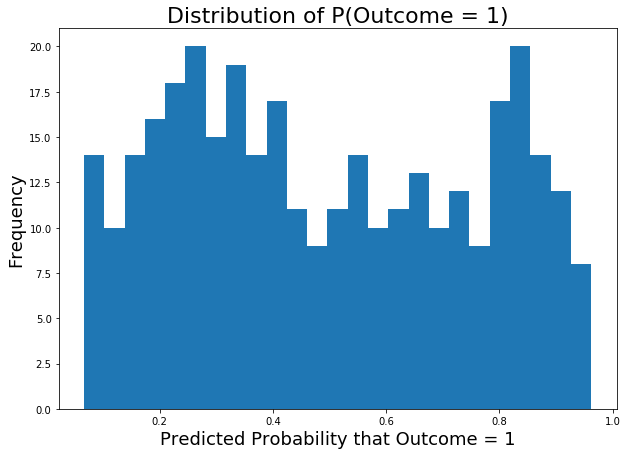

In [76]:
# Create figure.
plt.figure(figsize = (10,7))

# Create histogram of observations.
plt.hist(pred_df['pred_probs'], bins=25)

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)

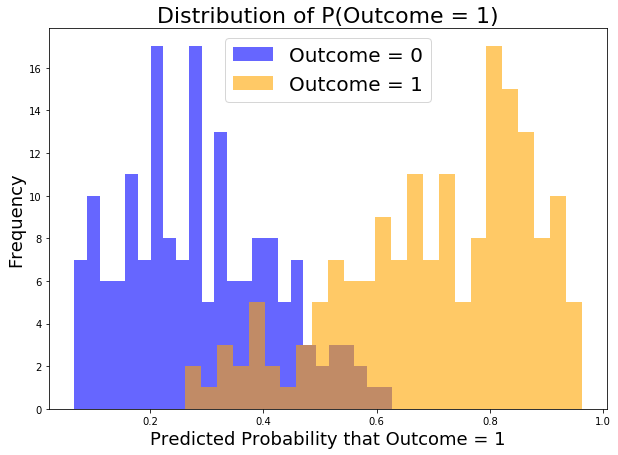

In [77]:
# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins=25,
         color='b',
         alpha = 0.6,
         label='Outcome = 0')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins=25,
         color='orange',
         alpha = 0.6,
         label='Outcome = 1')

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)

# Create legend.
plt.legend(fontsize=20);

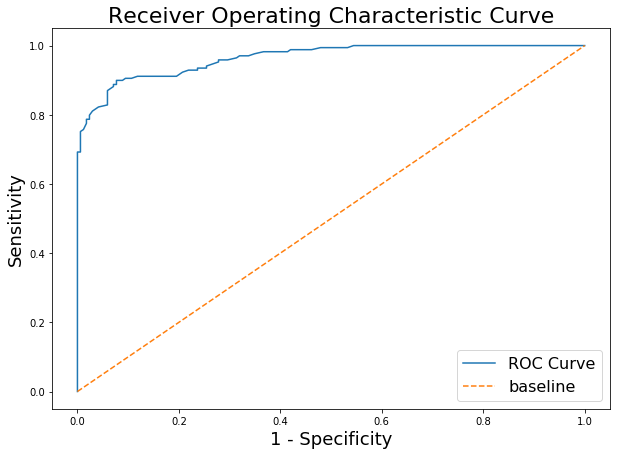

In [78]:
#ROC
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values.
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title('Receiver Operating Characteristic Curve', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);